<a href="https://colab.research.google.com/github/jcriostorres/Concentrador_solar/blob/main/Analisis_concentrador_Solar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Diseño y análisis de un concentrador solar utilizando un multímetro con termocupla una antena y Python




In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# llamr los datos por archivo
#df = pd.read_csv('temp_CS_carepa2024-05-05.csv') # datos experimentales e historicos

# Análisis estadístico básico
#print(df.describe())

In [3]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Ahora, puedes leer el archivo CSV
df = pd.read_csv(fn)

Saving temp_CS_carepa2024-05-05.csv to temp_CS_carepa2024-05-05.csv
User uploaded file "temp_CS_carepa2024-05-05.csv" with length 2074 bytes


In [4]:
df= pd.read_csv('temp_CS_carepa2024-05-05.csv')
df['datetime'] = pd.to_datetime(df['datetime'])

df_especificas = df[df['datetime'].dt.date == pd.to_datetime('2024-05-05').date()][['datetime', 'temp', 'cloudcover', 'solarenergy', 'conditions']]

print(df_especificas)

print(df.describe())

              datetime  temp  cloudcover  solarenergy              conditions
0  2024-05-05 00:00:00  23.9        98.3          0.0                Overcast
1  2024-05-05 01:00:00  23.6        78.1          0.0        Partially cloudy
2  2024-05-05 02:00:00  23.4        99.8          0.0                Overcast
3  2024-05-05 03:00:00  23.3        84.5          0.0        Partially cloudy
4  2024-05-05 04:00:00  23.2        66.5          0.0        Partially cloudy
5  2024-05-05 05:00:00  23.1        99.8          0.0                Overcast
6  2024-05-05 06:00:00  25.0        50.0          0.0        Partially cloudy
7  2024-05-05 07:00:00  24.8        53.7          0.3        Partially cloudy
8  2024-05-05 08:00:00  26.0        50.0          0.9        Partially cloudy
9  2024-05-05 09:00:00  27.0        50.0          1.7  Rain, Partially cloudy
10 2024-05-05 10:00:00  27.9        64.8          2.3  Rain, Partially cloudy
11 2024-05-05 11:00:00  29.0        50.0          2.3  Rain, Par

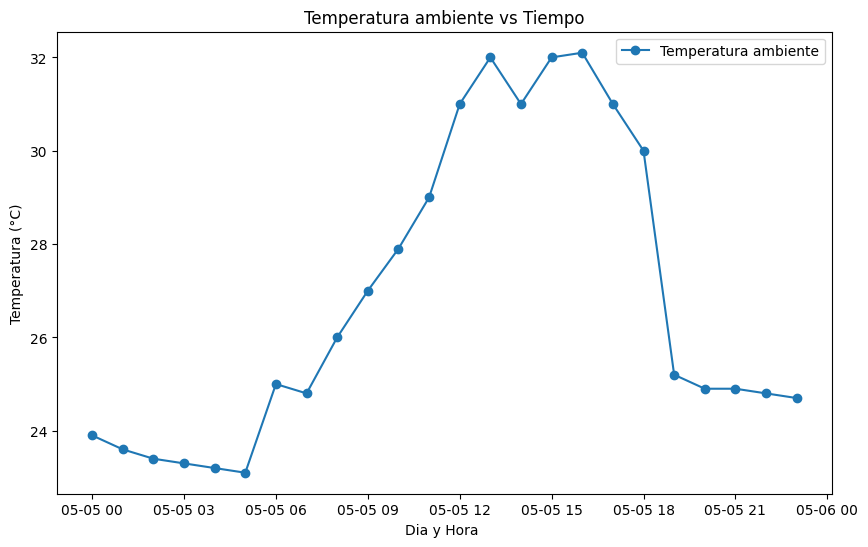

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#Convertir la columna 'datetime' a formato datetime
df['datetime'] = pd.to_datetime(df['datetime'])
df_filtered = df[df['datetime'].dt.date == pd.to_datetime('2024-05-05').date()]

# Crear un gráfico de puntos con línea para 'temp' vs 'datetime'
plt.figure(figsize=(10,6))
plt.plot(df_filtered ['datetime'], df_filtered ['temp'], marker='o', linestyle='-', label='Temperatura ambiente')

df_filtered[['temp', 'temp_expe']] = scaler.fit_transform(df_filtered[['temp', 'temp_expe', ]])


# Configurar el título y las etiquetas
plt.title('Temperatura ambiente vs Tiempo')
plt.xlabel('Dia y Hora ')
plt.ylabel('Temperatura (°C)')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


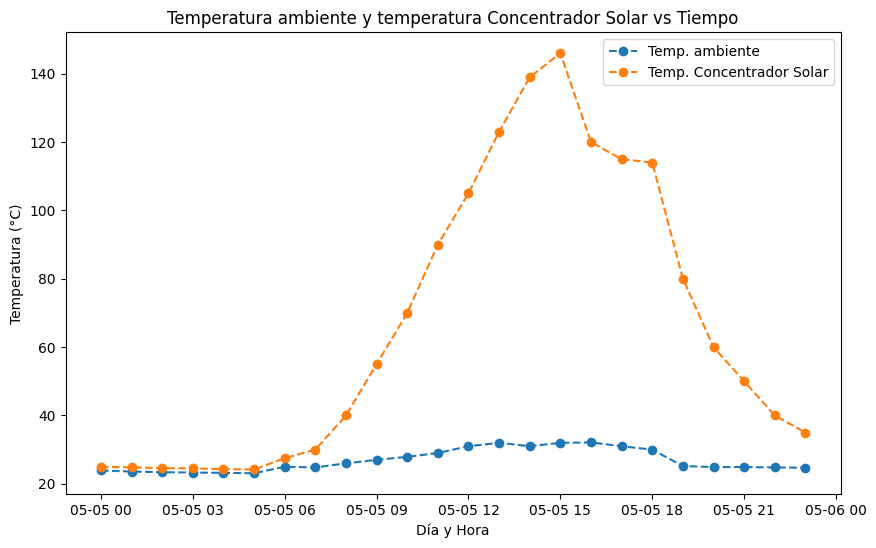

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Convertir la columna 'datetime' a formato datetime
df['datetime'] = pd.to_datetime(df['datetime'])
df_filtered = df[df['datetime'].dt.date == pd.to_datetime('2024-05-05').date()]

# Normalizar las columnas 'temp' y 'temp_expe' con MinMaxScaler
#df_filtered[['temp', 'temp_expe']] = scaler.fit_transform(df_filtered[['temp', 'temp_expe']])

# Crear un gráfico de puntos con línea para 'temp' y 'temp_expe' vs 'datetime'
plt.figure(figsize=(10,6))
plt.plot(df_filtered['datetime'], df_filtered['temp'], marker='o', linestyle='--', label='Temp. ambiente')
plt.plot(df_filtered['datetime'], df_filtered['temp_expe'], marker='o', linestyle='--', label='Temp. Concentrador Solar')

# Configurar el título y las etiquetas
plt.title('Temperatura ambiente y temperatura Concentrador Solar vs Tiempo')
plt.xlabel('Día y Hora')
plt.ylabel('Temperatura (°C)')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

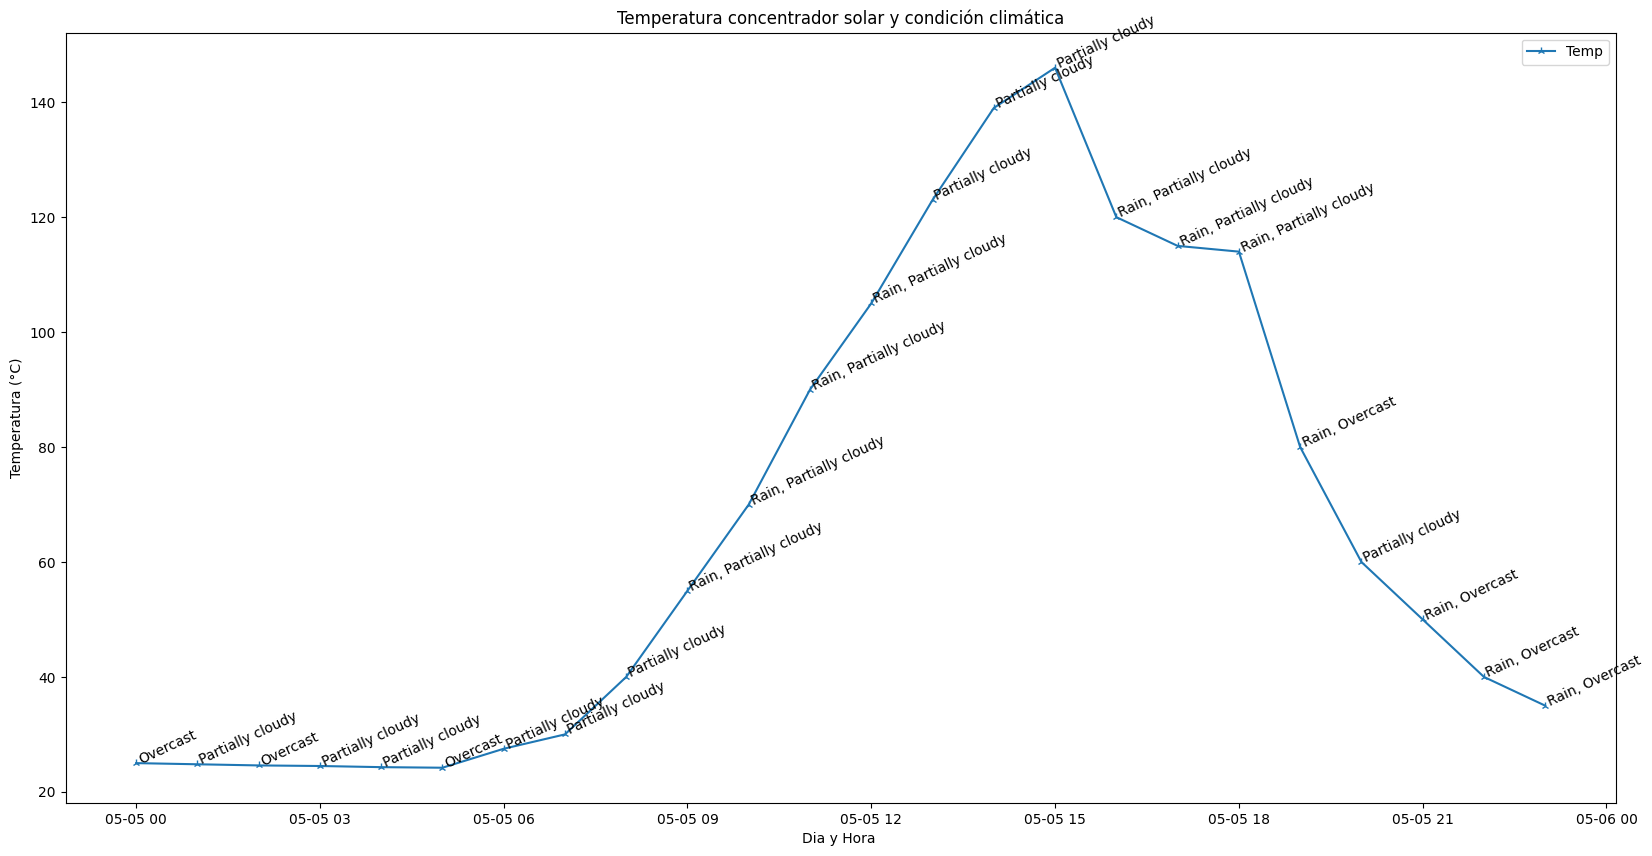

In [7]:

# Crear un gráfico de dispersión para 'temp_exp' vs 'datetime'
plt.figure(figsize=(20,10))
plt.plot(df_filtered['datetime'], df_filtered['temp_expe'], marker='2', linestyle='-', label='Temp')

# Añadir anotaciones de texto para 'conditions'
for i in range(len(df_filtered)):
    plt.text(df_filtered['datetime'].iloc[i], df_filtered['temp_expe'].iloc[i], df_filtered['conditions'].iloc[i], rotation=25)

# Configurar el título y las etiquetas
plt.title('Temperatura concentrador solar y condición climática')
plt.xlabel('Dia y Hora ')
plt.ylabel('Temperatura (°C)')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

## Consolidado de Temperaturas del Concentrador Solar y Condiciones Climáticas en Carepa, Antioquia - 5 de Mayo de 2025



Text(0, 0.5, 'Energía Solar (MJ/m2) - Nubosidad (%)')

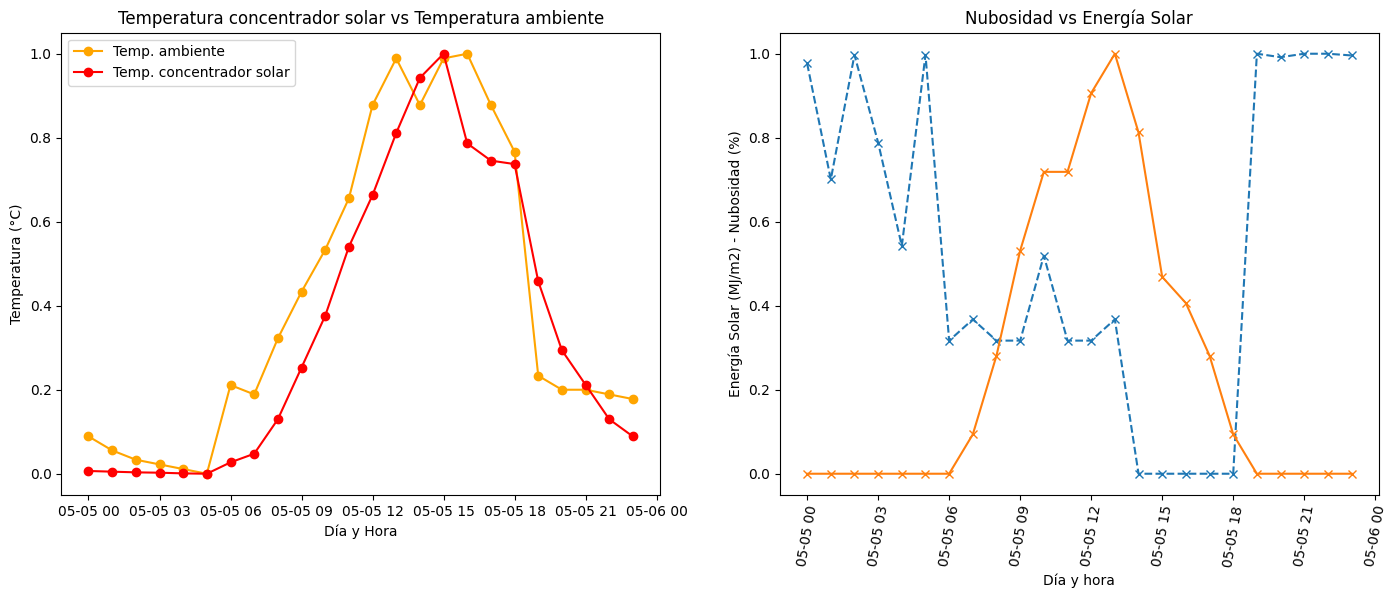

In [20]:
import matplotlib.pyplot as plt

df_filtered[['temp', 'cloudcover',  'temp_expe','solarenergy']] = scaler.fit_transform(df_filtered[['temp', 'cloudcover', 'temp_expe', 'solarenergy']])

# Crear una figura y un conjunto de subtramas
fig, axs = plt.subplots(1, 2, figsize=(17, 6))

plt.xticks(rotation=80)

# Primer gráfico: 'Temperatura experimental vs Temperatura'
axs[0].plot(df_filtered['datetime'], df_filtered['temp'], marker='o', linestyle='-', label='Temp. ambiente', color='orange')
axs[0].plot(df_filtered['datetime'], df_filtered['temp_expe'], marker='o', linestyle='-', label='Temp. concentrador solar', color='red')
axs[0].set_title('Temperatura concentrador solar vs Temperatura ambiente')
axs[0].set_xlabel('Día y Hora')
axs[0].set_ylabel('Temperatura (°C)')
axs[0].legend()



# Segundo gráfico: 'Nubosidad y Energía Solar históricos'
# Supongamos que df_filtered tiene las columnas 'nubosidad' y 'energia_solar'
axs[1].plot(df_filtered['datetime'], df_filtered['cloudcover'], marker='x', linestyle='--', label='Nubosidad')
axs[1].plot(df_filtered['datetime'], df_filtered['solarenergy'], marker='x', linestyle='-', label='Energía Solar')
axs[1].set_title('Nubosidad vs Energía Solar')
axs[1].set_xlabel('Día y hora')
axs[1].set_ylabel('Energía Solar (MJ/m2) - Nubosidad (%)')



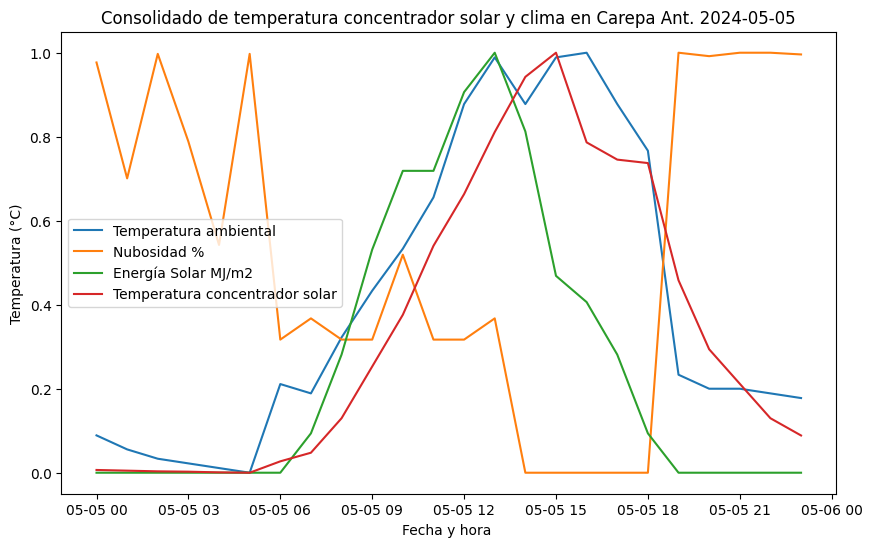

In [21]:
# Convertir la columna 'datetime' a formato datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# Filtrar el DataFrame para la fecha especificada
#df_filtered = df[df['datetime'].dt.date == pd.to_datetime('2024-05-05').date()]
# Convertir la columna 'datetime' a formato datetime
df_filtered[['temp', 'cloudcover',  'temp_expe','solarenergy']] = scaler.fit_transform(df_filtered[['temp', 'cloudcover', 'temp_expe', 'solarenergy']])

# Crear un gráfico de línea para 'temp'
plt.figure(figsize=(10,6))
plt.plot(df_filtered['datetime'], df_filtered['temp'], label='Temperatura ambiental')

# Crear un gráfico de línea para 'cloudcover'
plt.plot(df_filtered['datetime'], df_filtered['cloudcover'], label='Nubosidad %')

# Crear un gráfico de línea para 'solarenergy'
plt.plot(df_filtered['datetime'], df_filtered['solarenergy'], label='Energía Solar MJ/m2')

# Crear un gráfico de línea para 'temp_expe'

plt.plot(df_filtered['datetime'], df_filtered['temp_expe'], label='Temperatura concentrador solar')

# Configurar el título y las etiquetas
plt.title('Consolidado de temperatura concentrador solar y clima en Carepa Ant. 2024-05-05')
plt.xlabel('Fecha y hora ')
plt.ylabel('Temperatura (°C)')
plt.legend()

# Mostrar el gráfico
plt.show()